In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [12]:
def Loss(X,y,w):
    n_sample,n_feature = X.shape
    f1 = y * np.dot(X,w)   #yi * Xi *w
    loss = np.sum(np.log(np.exp(-f1) + 1))/n_sample #(1/n) * sum(ln(1+exp(-ywx)))
    
    #f1 = y * np.dot(X,w)   #yi * Xi *w
    #loss = np.sum(np.log(np.exp(-(y * np.dot(X,w))) + 1))/n_sample
    
    return loss     

In [13]:
def Sgradient(X,y,w):
    n_sample,n_feature = X.shape
    f1 = y * X  #yi * Xi
    f2 = y * np.dot(X,w)   #yi * Xi *w
    grad_matrix = np.zeros((n_sample,n_feature))
    for i in range(n_sample):
        grad_matrix[i] = - (f1[i]/(1 + np.exp(f2[i,0])))
    return grad_matrix

In [14]:
def Gradient(X,y,w):
    gradient1 = Sgradient(X,y,w)
    n_sample,n_feature = X.shape
    gradient = np.zeros((1,n_feature))
    for i in range(n_sample):
        gradient = gradient + gradient1[i]
    gradient = gradient/n_sample
    return gradient

In [17]:
def RMSProp(X_train,y_train,X_test,y_test,w,iteration,train_loss,test_loss):
    lr = 0.001
    t = 0.9
    G = 0
    for i in range(iteration):
        grad = Gradient(X_train,y_train,w).T
        c = np.power(10.0,-8)
        G = t * G + (1-t)*(grad*grad)
        w = w - (lr / np.sqrt(G + c) * grad)
        train_loss.append(Loss(X_train,y_train,w))
        test_loss.append(Loss(X_test,y_test,w))
    return w
            

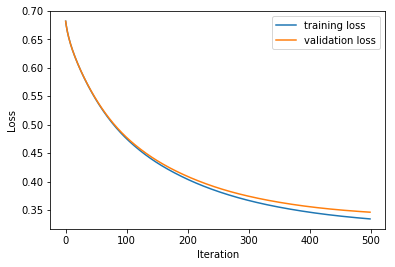

In [18]:
#data_train = load_svmlight_file("/home/wade/ML2017-lab-02/a9a.txt")
#data_test = load_svmlight_file("/home/wade/ML2017-lab-02/a9a_test.txt")

#X_train = data_train[0].toarray()
#X_test = data_test[0].toarray()
#y_train = data_train[1].reshape(X_train.shape[0],1)
#y_test = data_test[1].reshape(X_test.shape[0],1)

data = load_svmlight_file("/home/wade/ML2017-lab-02/a9a.txt")
X = data[0].toarray()  #将特征集转为506*13矩阵
number_data=len(data[1])
y = data[1].reshape(number_data,1) #将标记集转为501*1矩阵
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33) #将数据集切分为训练集和验证集




w = np.zeros((X_train.shape[1],1))
train_loss = []
test_loss = []
iteration = 500


w = RMSProp(X_train,y_train,X_test,y_test,w,iteration,train_loss,test_loss)

plt.plot(range(iteration),train_loss,label='training loss')
plt.plot(range(iteration),test_loss,label ="validation loss")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
X_test.shape

(10746, 123)

In [ ]:
y.shape